In [1]:
print("""
@Description: 输入/输出操作
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-21 17:07:47
""")


@Description: 输入/输出操作
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-21 17:07:47



# 输入/输出操作

## Python 基本 I/O

In [2]:
from pylab import plt, mpl
plt.rcParams['figure.figsize'] = (10, 6)
import pickle
import numpy as np
from random import gauss
import os.path

In [3]:
a = [gauss(1.5, 2) for i in range(1_000_000)]
path = './'
pkl_file = open(path + 'data.pkl', 'wb')

In [4]:
%time pickle.dump(a, pkl_file)
pkl_file.close()

CPU times: total: 15.6 ms
Wall time: 23.3 ms


In [5]:
os.path.getsize('data.pkl')

9003247

In [6]:
pkl_file = open(path + 'data.pkl', 'rb')
%time b = pickle.load(pkl_file)

CPU times: total: 0 ns
Wall time: 57.1 ms


In [7]:
a[:3]

[6.469040940852912, 0.9285933766263553, 3.0179307237254203]

In [8]:
b[:3]

[6.469040940852912, 0.9285933766263553, 3.0179307237254203]

In [9]:
assert np.allclose(a[:3], b[:3])

In [10]:
pkl_file = open(path + 'data.pkl', 'wb')
%time pickle.dump(np.array(a), pkl_file)
%time pickle.dump(np.array(a) ** 2, pkl_file)
pkl_file.close()

CPU times: total: 15.6 ms
Wall time: 48.6 ms
CPU times: total: 31.2 ms
Wall time: 57.1 ms


In [11]:
os.path.getsize('data.pkl')

16000324

In [12]:
pkl_file = open(path + 'data.pkl', 'rb')
x = pickle.load(pkl_file)
x[:4]

array([6.46904094, 0.92859338, 3.01793072, 1.83944126])

In [13]:
y = pickle.load(pkl_file)
y[:4]

array([41.84849069,  0.86228566,  9.10790585,  3.38354414])

In [14]:
pkl_file.close()

 显然，`pickle` 按照先进先出（FIFO）原则保存对象，这种方法由一个重大问题：**没有任何的可用元数据可以让用户知道保存在 pickle 文件中的是什么**

In [15]:
pkl_file = open(path + 'data.pkl', 'wb')
pickle.dump({'x': x, 'y': y}, pkl_file)
pkl_file.close()

In [16]:
pkl_file = open(path + 'data.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
type(data)

dict

In [17]:
for key in data.keys():
    print(key, data[key][:4])

x [6.46904094 0.92859338 3.01793072 1.83944126]
y [41.84849069  0.86228566  9.10790585  3.38354414]


这种方法要求我们一次性写入和读取所有的对象，在许多情况下，需要为了更便利而容忍这个问题。

警告：
兼容性问题

### 读取和写入文本文件

In [18]:
import numpy as np
rows = 5_000
a = np.random.standard_normal((rows, 5)).round(4)
a

array([[ 0.4539, -1.6533, -0.035 , -0.1305,  0.6076],
       [ 0.5964, -0.1259,  2.2073,  0.8253,  0.8032],
       [ 1.5632, -1.7837, -0.7797, -2.2783, -2.202 ],
       ...,
       [-1.0902, -2.1058, -1.1961,  0.1695,  0.5117],
       [ 0.4173,  0.8182, -1.0701,  0.256 , -1.2519],
       [ 0.528 , -2.0467,  0.0287,  0.8033,  0.1372]])

In [19]:
import pandas as pd
t = pd.date_range(start='2019/1/1', periods=rows, freq='H')
t

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-07-27 22:00:00', '2019-07-27 23:00:00',
               '2019-07-28 00:00:00', '2019-07-28 01:00:00',
               '2019-07-28 02:00:00', '2019-07-28 03:00:00',
               '2019-07-28 04:00:00', '2019-07-28 05:00:00',
               '2019-07-28 06:00:00', '2019-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [20]:
csv_file = open(path + 'data.csv', 'w')
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

25

In [21]:
len(header)

25

In [22]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):
    s = f'{t_},{no1},{no2},{no3},{no4},{no5}\n'
    csv_file.write(s)
csv_file.close()

In [23]:
os.path.getsize('data.csv')

289722

----

In [24]:
csv_file = open(path + 'data.csv', 'r')
for i in range(5):
    print(csv_file.readline(), end='')
csv_file.close()

date,no1,no2,no3,no4,no5
2019-01-01 00:00:00,0.4539,-1.6533,-0.035,-0.1305,0.6076
2019-01-01 01:00:00,0.5964,-0.1259,2.2073,0.8253,0.8032
2019-01-01 02:00:00,1.5632,-1.7837,-0.7797,-2.2783,-2.202
2019-01-01 03:00:00,-0.6816,0.2748,0.5864,-0.0115,-1.0661


----

In [25]:
csv_file = open(path + 'data.csv', 'r')
# 结果是一个列表对象，包含表示所有行的单独字符串对象。
content = csv_file.readlines()
content[:5]

['date,no1,no2,no3,no4,no5\n',
 '2019-01-01 00:00:00,0.4539,-1.6533,-0.035,-0.1305,0.6076\n',
 '2019-01-01 01:00:00,0.5964,-0.1259,2.2073,0.8253,0.8032\n',
 '2019-01-01 02:00:00,1.5632,-1.7837,-0.7797,-2.2783,-2.202\n',
 '2019-01-01 03:00:00,-0.6816,0.2748,0.5864,-0.0115,-1.0661\n']

In [26]:
csv_file.close()

----

In [27]:
import csv

In [28]:
with open(path + 'data.csv', 'r') as f:
    # csv.reader()将每一行当成一个列表对象返回。
    csv_reader = csv.reader(f)
    lines = [line for line in csv_reader]

In [29]:
lines[:5]

[['date', 'no1', 'no2', 'no3', 'no4', 'no5'],
 ['2019-01-01 00:00:00', '0.4539', '-1.6533', '-0.035', '-0.1305', '0.6076'],
 ['2019-01-01 01:00:00', '0.5964', '-0.1259', '2.2073', '0.8253', '0.8032'],
 ['2019-01-01 02:00:00', '1.5632', '-1.7837', '-0.7797', '-2.2783', '-2.202'],
 ['2019-01-01 03:00:00', '-0.6816', '0.2748', '0.5864', '-0.0115', '-1.0661']]

In [30]:
with open(path + 'data.csv', 'r') as f:
    csv_reader = csv.DictReader(f)
    # csv.DictReader()将每一行当成字典对象返回，
    lines = [line for line in csv_reader]
lines[:3]

[{'date': '2019-01-01 00:00:00',
  'no1': '0.4539',
  'no2': '-1.6533',
  'no3': '-0.035',
  'no4': '-0.1305',
  'no5': '0.6076'},
 {'date': '2019-01-01 01:00:00',
  'no1': '0.5964',
  'no2': '-0.1259',
  'no3': '2.2073',
  'no4': '0.8253',
  'no5': '0.8032'},
 {'date': '2019-01-01 02:00:00',
  'no1': '1.5632',
  'no2': '-1.7837',
  'no3': '-0.7797',
  'no4': '-2.2783',
  'no5': '-2.202'}]

### 使用 SQL 数据库

In [31]:
import sqlite3 as sq3

In [32]:
# 打开一个数据库连接；创建一个文件（如果不存在）。
if os.path.exists('numbs.db'):
    os.remove('numbs.db')
con = sq3.connect(path + 'numbs.db')
query = 'CREATE TABLE numbs (Date date, No1 reel, No2 real)'
con.execute(query)
con.commit()

In [33]:
q = con.execute
# 读取关于数据库的元信息，将刚刚创建的表显示为单个对象。
q('SELECT * FROM sqlite_master').fetchall()

[('table',
  'numbs',
  'numbs',
  2,
  'CREATE TABLE numbs (Date date, No1 reel, No2 real)')]

In [34]:
import datetime
now = datetime.datetime.now()
q('INSERT INTO numbs VALUES (?, ?, ?)', (now, .12, 7.3))

In [35]:
np.random.seed(100)
data = np.random.standard_normal((10_000, 2)).round(4)

In [36]:
%%time
for row in data:
    now = datetime.datetime.now()
    q('INSERT INTO numbs VALUES(?, ?, ?)', (now, row[0], row[1]))
con.commit()

CPU times: total: 46.9 ms
Wall time: 64.5 ms


In [37]:
q('SELECT * FROM numbs').fetchmany(3)

[('2023-07-31 11:40:33.838219', 0.12, 7.3),
 ('2023-07-31 11:40:33.856985', -1.7498, 0.3427),
 ('2023-07-31 11:40:33.856985', 1.153, -0.2524)]

In [38]:
pointer = q("SELECT * FROM numbs")
for i in range(3):
    print(pointer.fetchone())

('2023-07-31 11:40:33.838219', 0.12, 7.3)
('2023-07-31 11:40:33.856985', -1.7498, 0.3427)
('2023-07-31 11:40:33.856985', 1.153, -0.2524)


In [39]:
# 重复运行就将没有结果，因为指针已经指到最后了（不确定）
rows = pointer.fetchall()
rows[:3]

[('2023-07-31 11:40:33.856985', 0.9813, 0.5142),
 ('2023-07-31 11:40:33.856985', 0.2212, -1.07),
 ('2023-07-31 11:40:33.856985', -0.1895, 0.255)]

In [40]:
q('DROP TABLE IF EXISTS numbs')

In [41]:
q('SELECT * FROM sqlite_master').fetchall()

[]

In [42]:
con.close()

### 读写 Numpy 数组

In [43]:
dtimes = np.arange('2019-01-01 10:00:00', '2025-12-31 22:00:00',
                   dtype='datetime64[m]')
len(dtimes)

3681360

In [44]:
dty = np.dtype([('Date', 'datetime64[m]'),
                ('No1', 'f'),
                ('No2', 'f'),])
data = np.zeros(len(dtimes), dtype=dty)

In [45]:
data['Date'] = dtimes

In [46]:
a = np.random.standard_normal((len(dtimes), 2)).round(4)

In [47]:
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

In [48]:
data.nbytes

58901760

In [49]:
%time np.save(path + 'array', data)

CPU times: total: 46.9 ms
Wall time: 175 ms


In [50]:
os.path.getsize('array.npy')

58901952

In [51]:
%time np.load(path + 'array.npy')

CPU times: total: 15.6 ms
Wall time: 31.5 ms


array([('2019-01-01T10:00',  1.5131,  0.6973),
       ('2019-01-01T10:01', -1.722 , -0.4815),
       ('2019-01-01T10:02',  0.8251,  0.3019), ...,
       ('2025-12-31T21:57',  1.372 ,  0.6446),
       ('2025-12-31T21:58', -1.2542,  0.1612),
       ('2025-12-31T21:59', -1.1997, -1.097 )],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [52]:
%time data = np.random.standard_normal((10_000, 6_000)).round(4)

CPU times: total: 1.56 s
Wall time: 1.86 s


In [53]:
data.nbytes

480000000

In [54]:
%time np.save(path + 'array', data)

CPU times: total: 15.6 ms
Wall time: 514 ms


In [55]:
os.path.getsize('array.npy')

480000128

In [56]:
%time np.load(path + 'array.npy')

CPU times: total: 156 ms
Wall time: 170 ms


array([[ 0.3066,  0.5951,  0.5826, ...,  1.6773,  0.4294, -0.2216],
       [ 0.8769,  0.7292, -0.9557, ...,  0.5084,  0.9635, -0.4443],
       [-1.2202, -2.5509, -0.0575, ..., -1.6128,  0.4662, -1.3645],
       ...,
       [-0.5598,  0.2393, -2.3716, ...,  1.7669,  0.2462,  1.035 ],
       [ 0.273 ,  0.8216, -0.0749, ..., -0.0552, -0.8396,  0.3077],
       [-0.6305,  0.8331,  1.3702, ...,  0.3493,  0.1981,  0.2037]])

## pandas 的 I/O

In [57]:
data = np.random.standard_normal((1_000_000, 5)).round(4)
data[:3]

array([[ 0.4918,  1.3707,  0.137 ,  0.3981, -1.0059],
       [ 0.4516,  1.4445,  0.0555, -0.0397,  0.44  ],
       [ 0.1629, -0.8473, -0.8223, -0.4621, -0.5137]])

### 使用 SQL 数据库

In [58]:
if os.path.exists(path + 'numbers.db'):
    os.remove(path + 'numbers.db')
filename = path + 'numbers'
con = sq3.Connection(filename + '.db')
query = 'CREATE TABLE numbers (No1 real, No2 real, No3 real, No4 real, No5 real)'
q = con.execute
qm = con.executemany
q(query)

In [59]:
%%time
qm('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()

CPU times: total: 3.39 s
Wall time: 3.68 s


In [60]:
os.path.getsize('numbers.db')

52633600

In [61]:
%%time
temp = q('SELECT * FROM numbers').fetchall()
print(temp[:3])

[(0.4918, 1.3707, 0.137, 0.3981, -1.0059), (0.4516, 1.4445, 0.0555, -0.0397, 0.44), (0.1629, -0.8473, -0.8223, -0.4621, -0.5137)]
CPU times: total: 906 ms
Wall time: 1.02 s


In [62]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 1 and No2 < 0'
res = np.array(q(query).fetchall()).round(3)

CPU times: total: 234 ms
Wall time: 265 ms


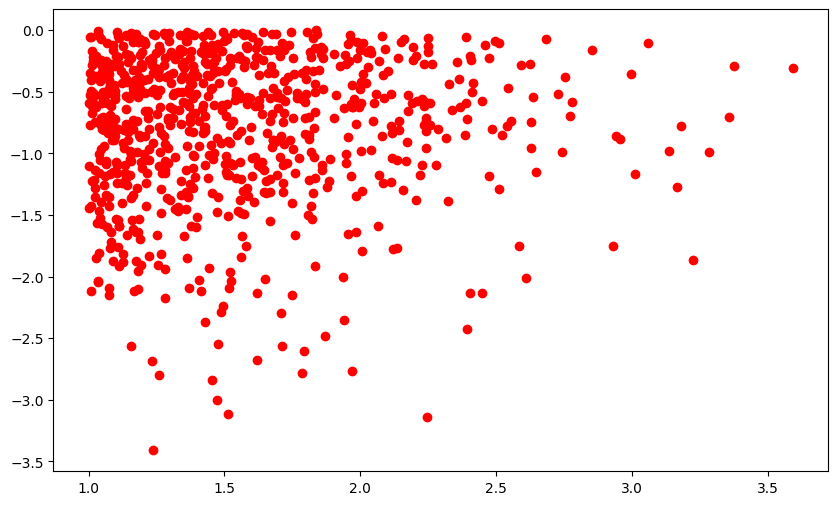

In [63]:
res = res[::100]
plt.figure()
plt.plot(res[:, 0], res[:, 1], 'ro')

### 从 SQL 到 pandas

In [64]:
%time data = pd.read_sql('SELECT * FROM numbers', con)

CPU times: total: 1.25 s
Wall time: 1.31 s


In [65]:
data.head()

,No1,No2,No3,No4,No5
0,0.4918,1.3707,0.1370,0.3981,-1.0059
1,0.4516,1.4445,0.0555,-0.0397,0.4400
2,0.1629,-0.8473,-0.8223,-0.4621,-0.5137
3,1.3064,0.9125,0.5142,-0.7868,-0.3398
4,-0.1148,-1.5215,-0.7045,-1.0042,-0.0600


In [66]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

CPU times: total: 15.6 ms
Wall time: 14.6 ms


,No1,No2,No3,No4,No5
2,0.1629,-0.8473,-0.8223,-0.4621,-0.5137
5,0.1893,-0.0207,-0.2104,0.9419,0.2551
8,1.4784,-0.3333,-0.7050,0.3586,-0.3937
10,0.8092,-0.9899,1.0364,-1.0453,0.0579
11,0.9065,-0.7757,-0.9267,0.7797,0.0863


In [67]:
%%time
q = '(No1 < -.5 | No1 > .5) & (No2 < -1 | No2 > 1)'
res = data[['No1', 'No2']].query(q)

CPU times: total: 0 ns
Wall time: 29.7 ms


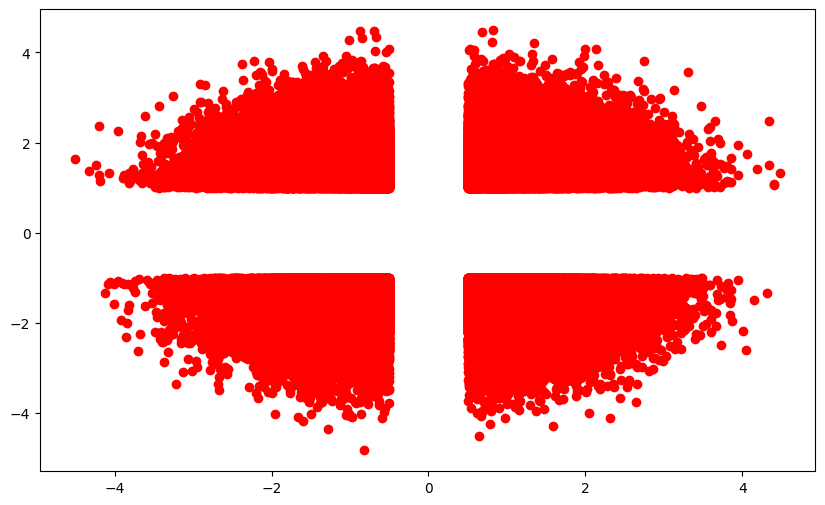

In [68]:
plt.figure()
plt.plot(res['No1'], res['No2'], 'ro')

In [70]:
h5s = pd.HDFStore(filename + '.h5s', 'w')
%time h5s['data'] = data

CPU times: total: 31.2 ms
Wall time: 76.7 ms


In [71]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: ./numbers.h5s

In [72]:
h5s.close()

In [73]:
%%time
h5s = pd.HDFStore(filename + '.h5s', 'r')
data_ = h5s['data']
h5s.close()

CPU times: total: 15.6 ms
Wall time: 57.3 ms


In [74]:
data_ is data

False

In [75]:
(data_ == data).all()

No1    True
No2    True
No3    True
No4    True
No5    True
dtype: bool

In [76]:
np.allclose(data_, data)

True

### 使用 CSV 文件

In [77]:
%time data.to_csv(filename + '.csv')

CPU times: total: 3.33 s
Wall time: 3.79 s


In [78]:
file_list = [file for file in os.listdir() if 'numbers' in file]
for file in file_list:
    print(f'{file:15}', os.path.getsize(file))

numbers.csv     44834158
numbers.db      52633600
numbers.h5s     48007240
numbers.xlsx    4012935


In [79]:
%time df = pd.read_csv(filename + '.csv')

CPU times: total: 422 ms
Wall time: 469 ms


array([[<Axes: title={'center': 'No1'}>, <Axes: title={'center': 'No2'}>],
       [<Axes: title={'center': 'No3'}>, <Axes: title={'center': 'No4'}>]],
      dtype=object)

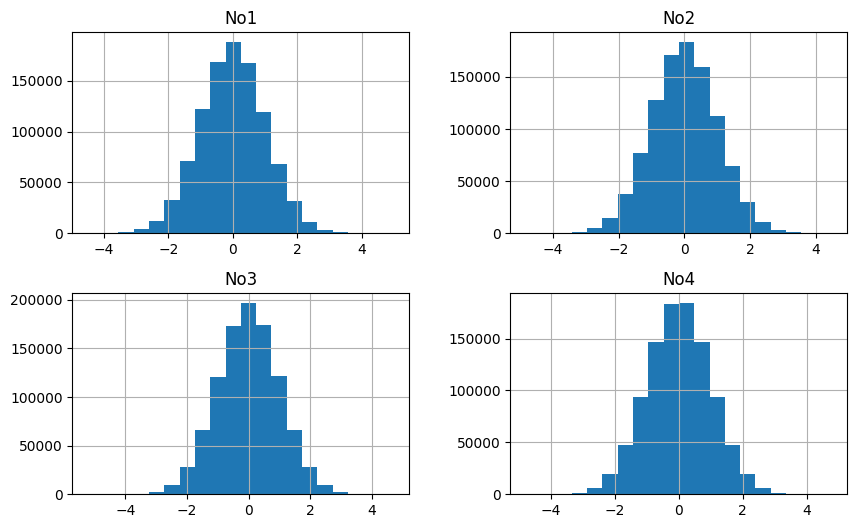

In [80]:
df[['No1', 'No2', 'No3', 'No4']].hist(bins=20)

### 使用 Excel 文件

In [82]:
%time data[:100_000].to_excel(filename + '.xlsx')

CPU times: total: 13.7 s
Wall time: 14.2 s


In [83]:
%time df = pd.read_excel(filename + '.xlsx', 'Sheet1')

CPU times: total: 4.8 s
Wall time: 4.96 s


<Axes: >

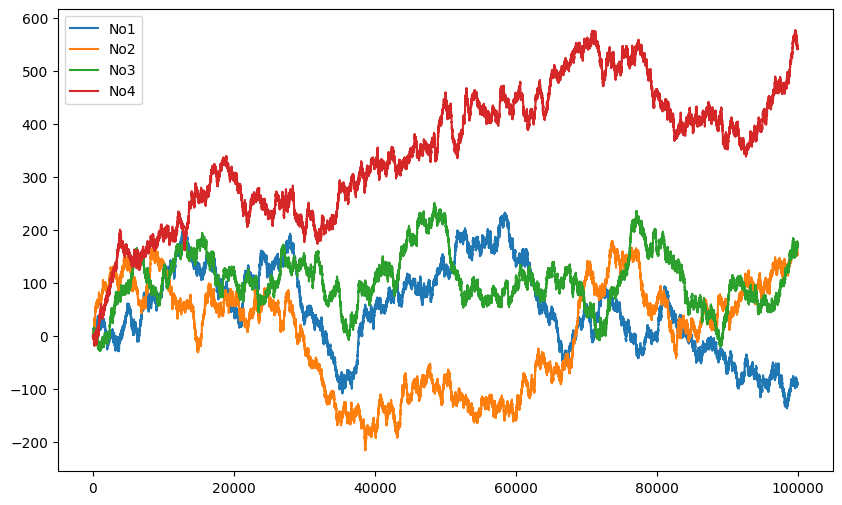

In [84]:
df[['No1', 'No2', 'No3', 'No4']].cumsum().plot()

In [85]:
file_list = [file for file in os.listdir() if 'numbers' in file]
for file in file_list:
    print(f'{file:15}', os.path.getsize(file))

numbers.csv     44834158
numbers.db      52633600
numbers.h5s     48007240
numbers.xlsx    4012935


## PyTables 的 I/O

In [1]:
import tables as tb
import datetime as dt
path = './'

### 使用表

In [2]:
filename = path + 'pytab.h5'
h5 = tb.open_file(filename, 'w')
row_des = {
    'Date': tb.StringCol(26, pos=1),
    'No1': tb.IntCol(pos=2),
    'No2': tb.IntCol(pos=3),
    'No3': tb.Float64Col(pos=4),
    'No4': tb.Float64Col(pos=5),
}
rows = 2_000_000
# 通过 Filters 对象可以指定压缩级别
filters = tb.Filters(complevel=1)
tab = h5.create_table('/', 'ints_floats', # 表的节点（路径）和技术名称
                      row_des, # 行数据结构描述
                      title='Integers and Floats', # 表名（标题）
                      expectedrows=rows, # 预期的行数，（可以优化） 
                      filters=filters, # 用于该表的 Filters 对象
                      )
type(tab)

tables.table.Table

In [3]:
tab

/ints_floats (Table(0,)shuffle, zlib(1)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [4]:
import numpy as np

In [5]:
pointer = tab.row
ran_int = np.random.randint(0, 10_000, size=(rows, 2))
ran_flo = np.random.standard_normal((rows, 2)).round(4)

In [6]:
%%time
# %%time 必须写在第一行
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i, 0]
    pointer['No2'] = ran_int[i, 1]
    pointer['No3'] = ran_flo[i, 0]
    pointer['No4'] = ran_flo[i, 1]
    # 附加新行
    pointer.append()
# 所有写入行都必须“冲走”（flushed），也就是提交为永久性更改
tab.flush()

CPU times: total: 6.36 s
Wall time: 7.02 s


In [7]:
tab

/ints_floats (Table(2000000,)shuffle, zlib(1)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [8]:
dty = np.dtype([('Date', 'S26'),
                ('No1', '<i4'),
                ('No2', '<i4'),
                ('No3', '<f8'),
                ('No4', '<f8'),])
sarray = np.zeros(len(ran_int), dtype=dty)
sarray[:4]

array([(b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.),
       (b'', 0, 0, 0., 0.)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [9]:
%%time
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:, 0]
sarray['No2'] = ran_int[:, 1]
sarray['No3'] = ran_flo[:, 0]
sarray['No4'] = ran_flo[:, 1]

CPU times: total: 15.6 ms
Wall time: 80.9 ms


In [10]:
%%time
h5.create_table('/', 'int_floats_from_array',
                sarray, title='Integers and Floats',
                expectedrows=rows, filters=filters)

CPU times: total: 781 ms
Wall time: 976 ms


/int_floats_from_array (Table(2000000,)shuffle, zlib(1)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [11]:
type(h5)

tables.file.File

In [12]:
h5
# 包含两个 Table 对象的 File 对象描述

File(filename=./pytab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/int_floats_from_array (Table(2000000,)shuffle, zlib(1)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/ints_floats (Table(2000000,)shuffle, zlib(1)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [13]:
h5.remove_node('/', 'int_floats_from_array')
# 删除包含冗余数据的第二个 Table 对象

In [14]:
tab[:3]

array([(b'2023-07-31 17:26:41.313762', 2673, 5210,  1.2977, -0.3698),
       (b'2023-07-31 17:26:41.313762', 2265, 8431, -0.1011, -1.3744),
       (b'2023-07-31 17:26:41.313762', 5301, 2521,  0.6836,  0.6118)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [15]:
tab[:5]['No3']

array([ 1.2977, -0.1011,  0.6836, -1.1205, -0.4288])

In [16]:
%time np.sum(tab[:]['No3'])

CPU times: total: 234 ms
Wall time: 344 ms


-873.7624999999997

In [17]:
%time np.sum(np.sqrt(tab[:]['No1']))

CPU times: total: 297 ms
Wall time: 317 ms


133360664.94590534

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

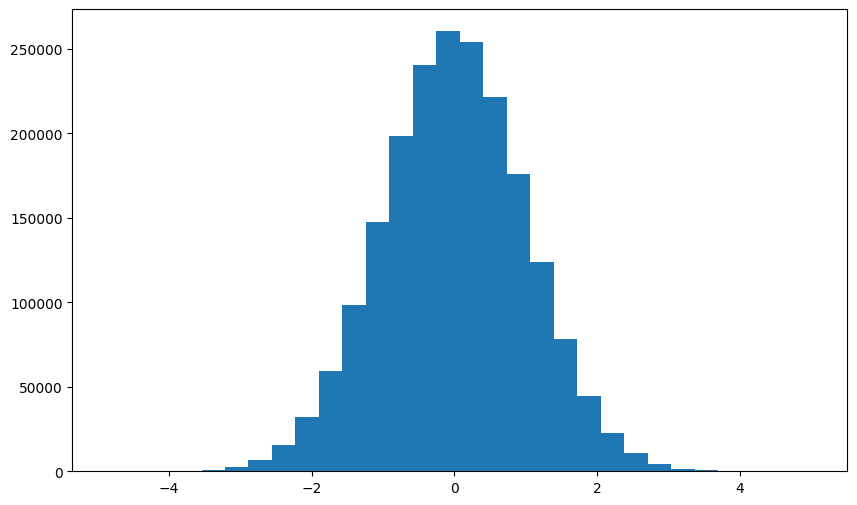

CPU times: total: 406 ms
Wall time: 503 ms


In [19]:
%%time
plt.figure()
plt.hist(tab[:]['No3'], bins=30)
plt.show()

PyTables 还提供了通过典型类 SQL 语句查询数据的灵活工具

In [20]:
query = '((No3 < -.5) | (No3 > .5)) & ((No4 < -1) | (No4 > 1))'
iterator = tab.where(query)

In [21]:
type(iterator)

tables.tableextension.Row

In [22]:
%time res = [(row['No3'], row['No4']) for row in iterator]

CPU times: total: 391 ms
Wall time: 472 ms


In [23]:
res = np.array(res)
res[:3]

array([[ 1.6258,  1.9068],
       [-0.5911, -1.2121],
       [-0.538 ,  1.1108]])

In [24]:
res[:, 0]

array([ 1.6258, -0.5911, -0.538 , ...,  0.6495, -1.3062,  1.247 ])

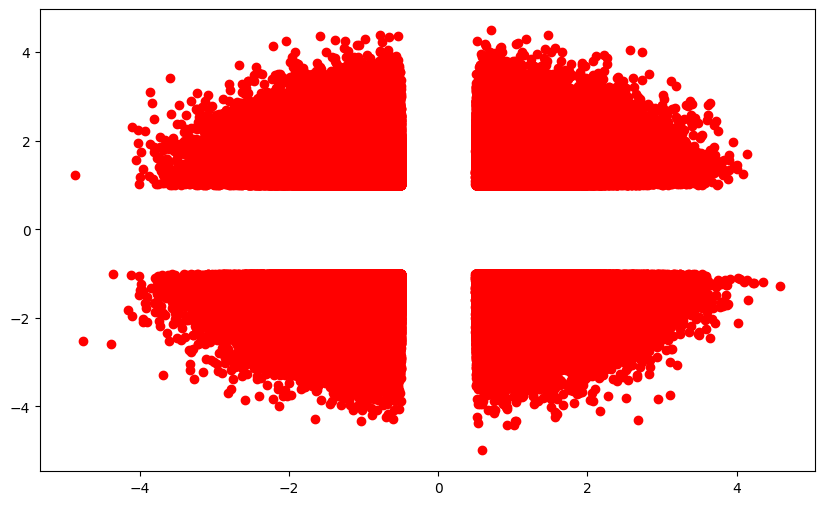

In [25]:
plt.plot()
# plt.plot(res[:, 0], res[:, 1], 'ro')
plt.plot(res.T[0], res.T[1], 'ro')
plt.show()

In [26]:
%%time
values = tab[:]['No3']
print(f'Min {values.min():>20.3f}')
print(f'Max {values.max():>20.3f}')
print(f'Avg {values.mean():>20.3f}')
print(f'Std {values.std():>20.3f}')

Min               -4.862
Max                5.015
Avg               -0.000
Std                1.000
CPU times: total: 266 ms
Wall time: 341 ms


In [27]:
res = tab.where('((No3 < -.5) | (No3 > .5)) & ((No4 < -1) | (No4 > 1))')

In [28]:
%%time
query = '((No1 > 9800) | (No1 < 200)) & ((No2 > 4500) | (No2 < 5500))'
res = tab.where(query)
res = [(row['No1'], row['No2']) for row in res]

CPU times: total: 312 ms
Wall time: 337 ms


In [29]:
for r in res[:4]:
    print(r)

(9962, 5138)
(2, 1709)
(9966, 2267)
(2, 4314)


In [30]:
%%time
query = '((No1 == 1234) & (No2 > 9776))'
tab.where(query)
res = [(row['No1'], row['No2']) for row in tab.where(query)]

CPU times: total: 281 ms
Wall time: 315 ms


In [31]:
for r in res:
    print(r)

(1234, 9829)
(1234, 9806)
(1234, 9801)


### 使用压缩表

In [32]:
filename = path + 'pytabc.h5'
h5c = tb.open_file(filename, 'w')
# complevel（压缩级别）参数取值范围为 0（无压缩）到 9（最高压缩率）
filters = tb.Filters(complevel=5,
                     # 使用 Blosc 压缩引擎，该引擎优化了性能
                     complib='blosc')
tabc = h5c.create_table('/', 'ints_floats', sarray,
                        title='Integers and Floats',
                        expectedrows=rows, filters=filters)
query = '((No3 < -.5) | (No3 > .5)) & ((No4 < -1) | (No4 > 1))'
iteratorc = tabc.where(query)

In [33]:
%time res = [(row['No3'], row['No4']) for row in iteratorc]

CPU times: total: 141 ms
Wall time: 222 ms


In [34]:
res = np.array(res)
res[:3]

array([[ 1.6258,  1.9068],
       [-0.5911, -1.2121],
       [-0.538 ,  1.1108]])

In [35]:
%time arr_non = tab.read()
# 从未压缩的表对象 tab 读取

CPU times: total: 250 ms
Wall time: 361 ms


In [36]:
tab.size_on_disk

38055193

In [37]:
arr_non.nbytes

100000000

In [38]:
%time arr_com = tabc.read()
# 从压缩表对象 tabc 读取

CPU times: total: 46.9 ms
Wall time: 76.9 ms


In [39]:
tabc.size_on_disk
# 显然没有出现很好的压缩效果

41593818

In [40]:
arr_com.nbytes

100000000

### 使用数组

In [41]:
%%time
arr_int = h5.create_array('/', 'integers', ran_int)
arr_flo = h5.create_array('/', 'floats', ran_flo)

CPU times: total: 0 ns
Wall time: 33.2 ms


In [42]:
h5

File(filename=./pytab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/floats (Array(2000000, 2)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/integers (Array(2000000, 2)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/ints_floats (Table(2000000,)shuffle, zlib(1)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [43]:
type(h5)

tables.file.File

In [44]:
h5.close()

In [45]:
import os
os.path.getsize('pytab.h5')

123397832

In [46]:
os.path.getsize('pytabc.h5')

41629114

### 内存外计算

In [47]:
filename = path + 'earray.h5'
h5 = tb.open_file(filename, 'w')
# 固定的列数
n = 500
# EArray 对象的路径和技术名称
ear = h5.create_earray('/', 'ear',
                       atom=tb.Float64Atom(),
                       shape=(0, n)) # 实例组成（0 行，n 列）

In [48]:
type(ear)

tables.earray.EArray

In [49]:
rand = np.random.standard_normal((n, n))
rand[:4, :4]

array([[-0.53974632, -0.51381506,  0.01758399, -2.08701296],
       [-1.04431957, -0.64989497,  1.15328824, -0.76474531],
       [-0.01825106,  0.51440178, -1.03892049, -0.35783132],
       [ 1.49983489, -1.46727603, -0.15037983, -0.39052378]])

In [50]:
%%time
for _ in range(750):
    ear.append(rand)
ear.flush()

CPU times: total: 672 ms
Wall time: 1.4 s


In [51]:
ear

/ear (EArray(375000, 500)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (16, 500)

In [52]:
ear.size_on_disk

1500032000

In [53]:
ear.size_in_memory

1500000000

In [54]:
out = h5.create_earray('/', 'out', 
                       atom=tb.Float64Atom(),
                       shape=(0, n))
out.size_on_disk

0

In [55]:
expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))')
expr.set_output(out, append_mode=True)

In [56]:
%time expr.eval()

CPU times: total: 4.17 s
Wall time: 5.11 s


/out (EArray(375000, 500)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (16, 500)

In [57]:
out.size_on_disk

1500032000

In [58]:
out[0, :10]

array([-0.80708088, -0.75770083,  0.18535391, -1.16442876, -0.5258213 ,
       -1.35545295,  3.89690547,  1.15975021, -1.63943887,  3.82805641])

In [59]:
%time out_ = out.read()
# 将整个 EArray 读入内存

CPU times: total: 656 ms
Wall time: 1.32 s


In [60]:
out_[0, :10]

array([-0.80708088, -0.75770083,  0.18535391, -1.16442876, -0.5258213 ,
       -1.35545295,  3.89690547,  1.15975021, -1.63943887,  3.82805641])

In [61]:
import numexpr as ne
expr = '2 * sin(out_) + sqrt(abs(out_))'
ne.set_num_threads(1)

8

In [62]:
%time ne.evaluate(expr)[0, :10]

CPU times: total: 3.05 s
Wall time: 3.89 s


array([-0.54616592, -0.50404609,  0.79911625, -0.75803838, -0.27871168,
       -0.78956694,  0.60302522,  2.91032365, -0.71488431,  0.68893016])

In [63]:
ne.set_num_threads(8)
# 将线程数设置为 8

1

In [64]:
%time ne.evaluate(expr)[0, :10]
# 通过 8 个线程在内存中求数值表达式的值。

CPU times: total: 4.11 s
Wall time: 927 ms


array([-0.54616592, -0.50404609,  0.79911625, -0.75803838, -0.27871168,
       -0.78956694,  0.60302522,  2.91032365, -0.71488431,  0.68893016])

In [65]:
h5.close()

## TsTables 的 I/O

### 样板数据

In [66]:
no = 5_000_000
co = 3
# 以年表示的时间间隔
interval = 1. / (12 * 30 * 24 * 60)
vol = .2

In [67]:
%%time
rn = np.random.standard_normal((no, co))
rn[0] = 0.0
# 基于欧拉离散的模拟
paths = 100 * np.exp(np.cumsum(-.5 * vol ** 2 * interval
                               + vol * np.sqrt(interval) * rn, axis=0))
paths[0] = 100

CPU times: total: 625 ms
Wall time: 800 ms


In [71]:
dr = pd.date_range('2019-1-1', periods=no, freq='1s')
dr[-6:]

DatetimeIndex(['2019-02-27 20:53:14', '2019-02-27 20:53:15',
               '2019-02-27 20:53:16', '2019-02-27 20:53:17',
               '2019-02-27 20:53:18', '2019-02-27 20:53:19'],
              dtype='datetime64[ns]', freq='S')

In [72]:
df = pd.DataFrame(paths, index=dr, columns=['ts1', 'ts2', 'ts3'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000000 entries, 2019-01-01 00:00:00 to 2019-02-27 20:53:19
Freq: S
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ts1     float64
 1   ts2     float64
 2   ts3     float64
dtypes: float64(3)
memory usage: 152.6 MB


In [74]:
df.head()

,ts1,ts2,ts3
2019-01-01 00:00:00,100.000000,100.000000,100.000000
2019-01-01 00:00:01,100.023345,99.998698,99.985394
2019-01-01 00:00:02,100.025301,100.001134,99.930431
2019-01-01 00:00:03,100.054902,99.991257,99.914191
2019-01-01 00:00:04,100.033939,99.938012,99.926171


<Axes: >

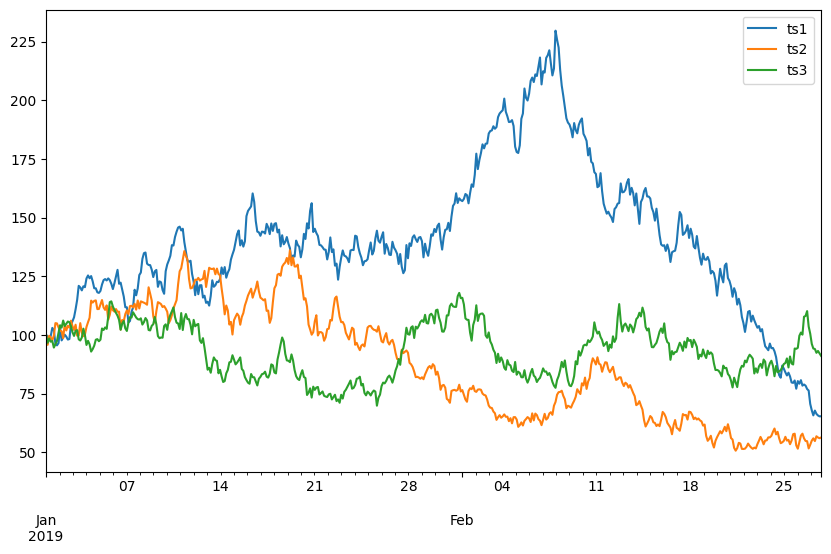

In [75]:
df[::10_000].plot()

In [76]:
df.head()

,ts1,ts2,ts3
2019-01-01 00:00:00,100.000000,100.000000,100.000000
2019-01-01 00:00:01,100.023345,99.998698,99.985394
2019-01-01 00:00:02,100.025301,100.001134,99.930431
2019-01-01 00:00:03,100.054902,99.991257,99.914191
2019-01-01 00:00:04,100.033939,99.938012,99.926171


### 数据存储

In [77]:
import tstables as tstab

In [78]:
class ts_desc(tb.IsDescription):
    timestamp = tb.Int64Col(pos=0)
    ts1 = tb.Float16Col(pos=1)
    ts2 = tb.Float16Col(pos=2)
    ts3 = tb.Float16Col(pos=3)

In [79]:
h5 = tb.open_file(path + 'tstab.h5', 'w')

In [80]:
ts = h5.create_ts('/', 'ts', ts_desc)

In [81]:
df.index.__class__

pandas.core.indexes.datetimes.DatetimeIndex

In [82]:
type(ts)

tstables.tstable.TsTable

In [83]:
%time ts.append(df)

ValueError: rows parameter cannot be converted into a recarray object compliant with table '<tstables.tstable.TsTable object at 0x0000021AB80F8410>'.  The error was: <When changing to a smaller dtype, its size must be a divisor of the size of original dtype>

In [ ]:
df.index.__class__

pandas.core.indexes.datetimes.DatetimeIndex